**RAIT PLACEMENT DATA 2022-24**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jaysh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
df = pd.read_excel('Main Data.xlsx')
original = df.copy()

In [4]:
df.shape

(1189, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1189 non-null   object 
 1   Branch                           1189 non-null   object 
 2   10th Percentage                  1189 non-null   float64
 3   10th Year of Passing             1189 non-null   int64  
 4   12th Or Diploma                  1189 non-null   object 
 5   12th or Diploma Percentage       1189 non-null   float64
 6   12th or Diploma Year of Passing  1189 non-null   int64  
 7   BE CGPI                          1189 non-null   float64
 8   Offers                           1189 non-null   object 
 9   Package                          1189 non-null   float64
 10  Year Of Placement                1189 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 102.3+ KB


In [6]:
columns_to_describe = ['10th Percentage', '12th or Diploma Percentage', 'BE CGPI', 'Package']

df[columns_to_describe].describe()

,10th Percentage,12th or Diploma Percentage,BE CGPI,Package
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,86.476140,75.491421,8.756263,4.988688
std,6.909272,9.408731,0.746651,1.903742
min,58.800000,48.770000,6.460000,0.000000
25%,82.800000,68.150000,8.250000,4.000000
50%,87.800000,75.230000,8.860000,4.250000
75%,91.600000,82.770000,9.350000,6.000000
max,99.000000,97.770000,10.000000,17.950000


In [7]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,1189,2,Male,865
Branch,1189,6,Computer Engineering,380
12th Or Diploma,1189,2,12th,1057
Offers,1189,151,TCS(Ninja),130


In [8]:
df.head()

,Gender,Branch,10th Percentage,10th Year of Passing,12th Or Diploma,12th or Diploma Percentage,12th or Diploma Year of Passing,BE CGPI,Offers,Package,Year Of Placement
0,Male,Computer Engineering,79.8,2018,12th,68.92,2020,8.63,63 Moons Technologies Limited,4.0,2024
1,Male,Information Technology,78.2,2018,Diploma,82.81,2021,7.50,63 Moons Technologies Limited,4.0,2024
2,Male,Computer Science and Business System,91.8,2018,12th,76.62,2020,9.66,63 Moons Technologies Limited,4.0,2024
3,Female,Computer Science and Business System,79.2,2018,12th,61.69,2020,8.30,63 Moons Technologies Limited,4.0,2024
4,Male,Information Technology,88.0,2018,12th,68.75,2018,8.99,63 Moons Technologies Limited,4.0,2024


In [9]:
df.isnull().sum()

Gender                             0
Branch                             0
10th Percentage                    0
10th Year of Passing               0
12th Or Diploma                    0
12th or Diploma Percentage         0
12th or Diploma Year of Passing    0
BE CGPI                            0
Offers                             0
Package                            0
Year Of Placement                  0
dtype: int64

In [10]:
df.columns = df.columns.str.strip()
df.groupby('Year Of Placement')['Package'].count()

Year Of Placement
2022    538
2023    471
2024    180
Name: Package, dtype: int64

In [11]:
df.groupby('Branch')['Package'].mean()

Branch
Computer Engineering                             5.317579
Computer Science and Business System             5.353913
Electronics Engineering                          4.621262
Electronics and Telecommunication Engineering    4.855804
Information Technology                           5.026465
Instrumentation Engineering                      4.495208
Name: Package, dtype: float64

In [12]:
# Group by both Branch and Gender to get the average package for each combination
branch_gender_avg = df.groupby(['Branch', 'Gender'])['Package'].mean().reset_index()

# Rename the column for clarity
branch_gender_avg = branch_gender_avg.rename(columns={'Package': 'Avg_Package'})

# Merge this back into the original DataFrame
df = df.merge(branch_gender_avg, on=['Branch', 'Gender'], how='left')


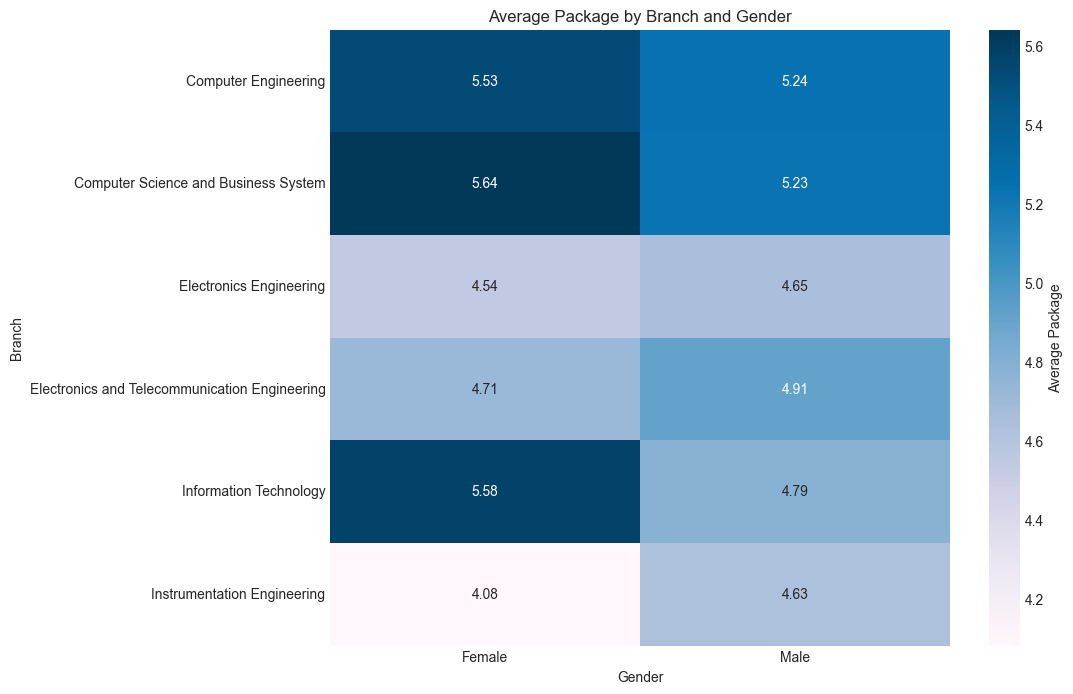

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for visualization
pivot_table = df.pivot_table(values='Avg_Package', index='Branch', columns='Gender', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='PuBu', annot=True, fmt=".2f", cbar_kws={'label': 'Average Package'})
plt.title("Average Package by Branch and Gender")
plt.xlabel("Gender")
plt.ylabel("Branch")
plt.show()


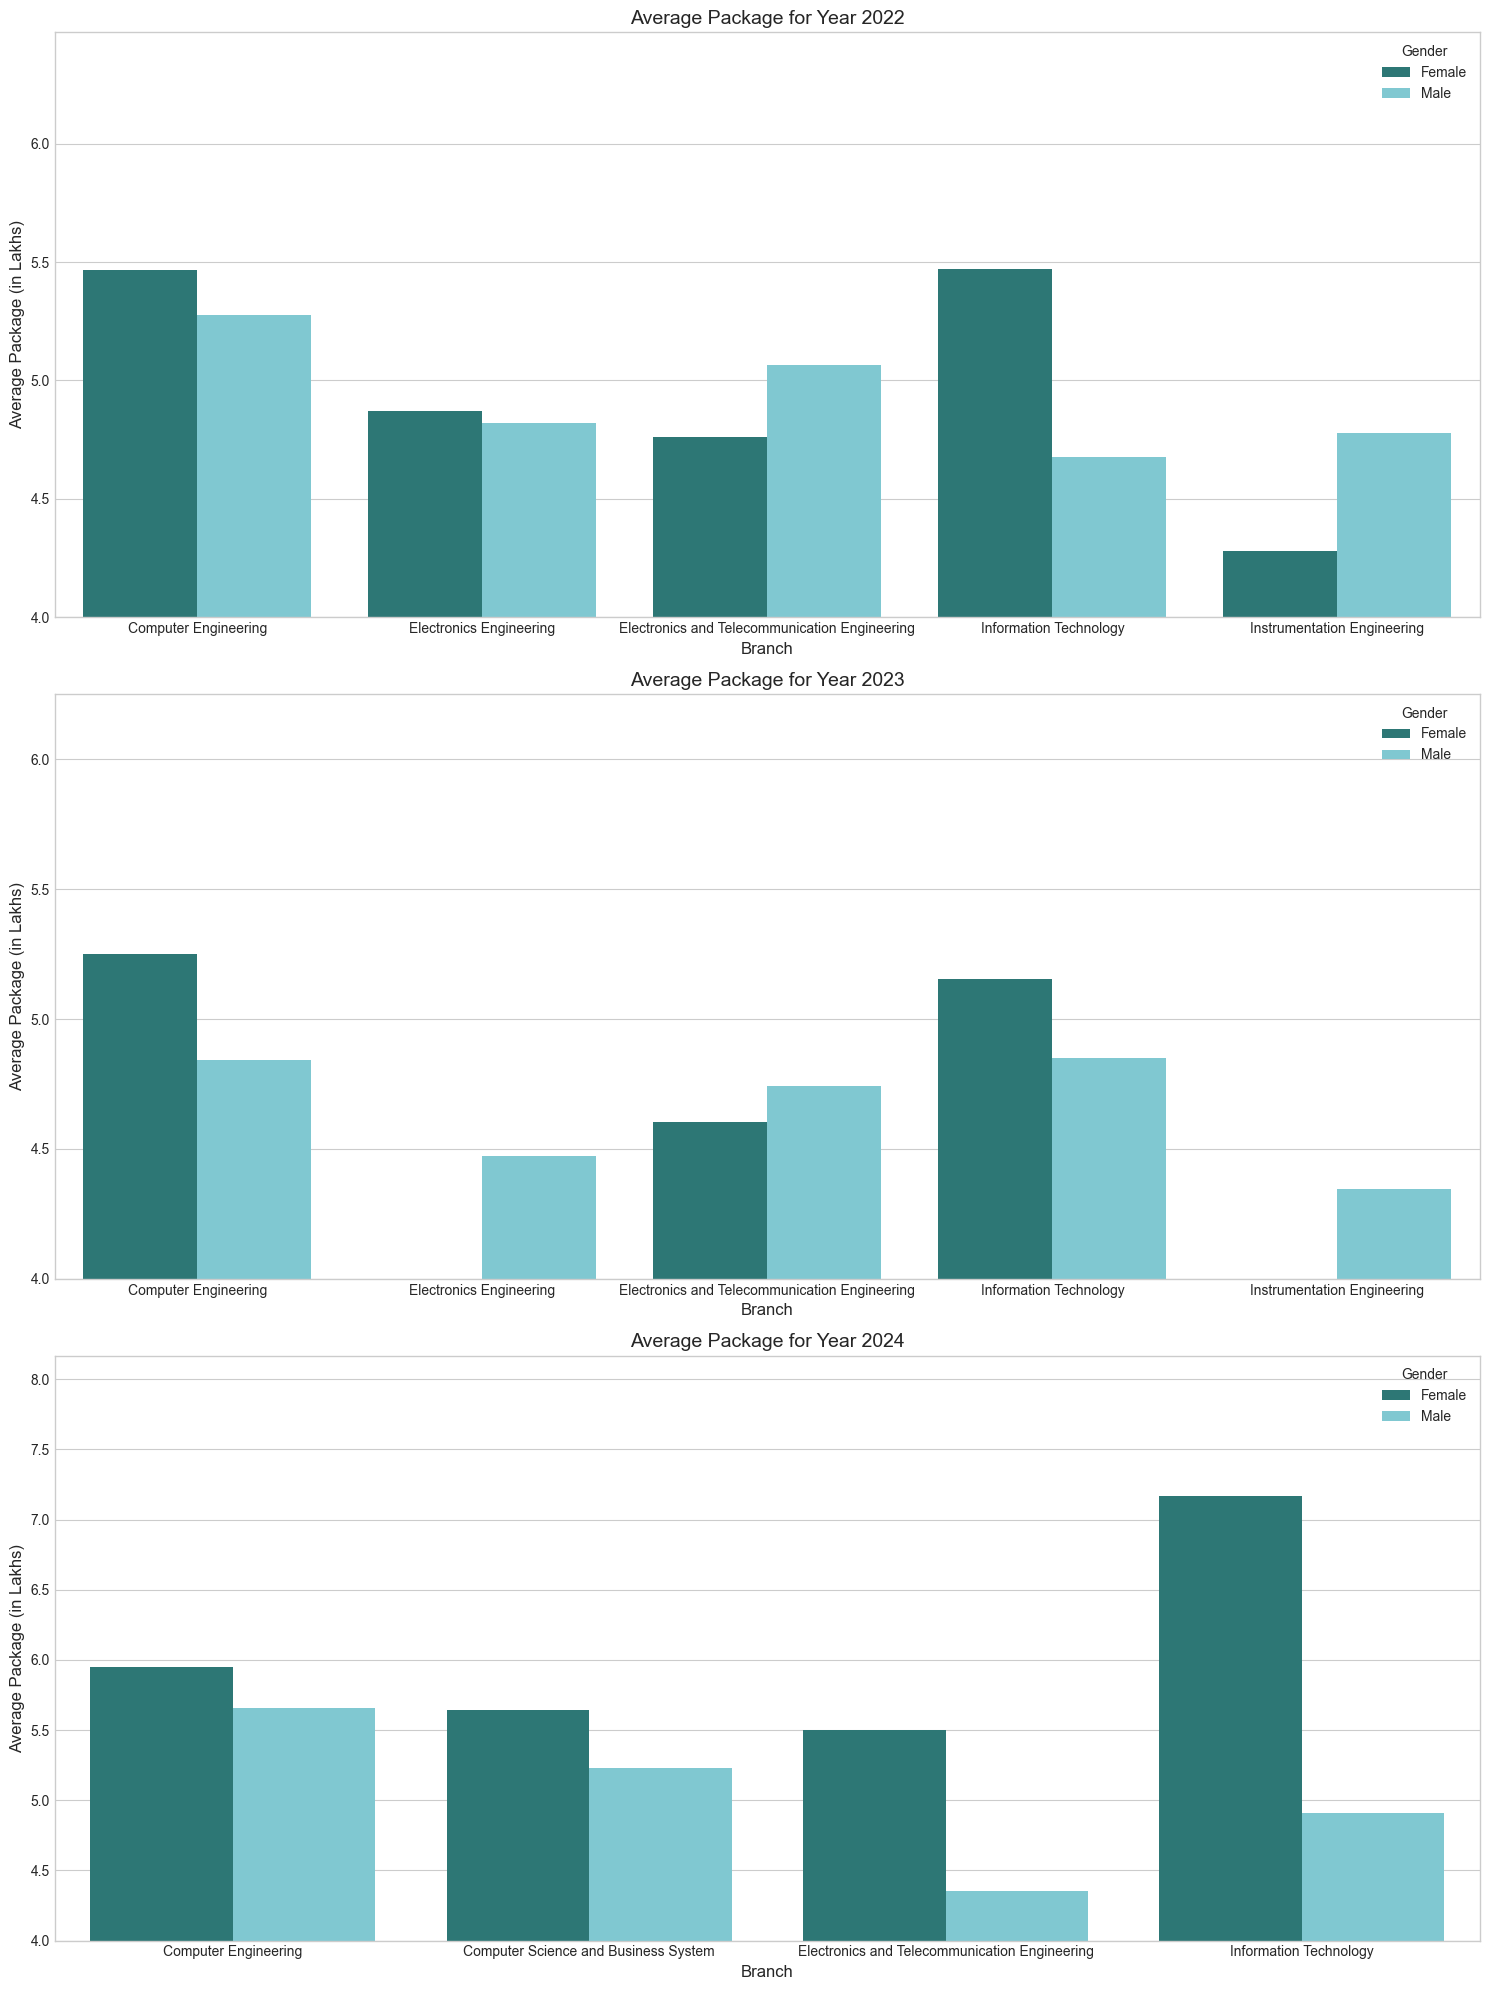

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Branch, Gender, and Year Of Placement to calculate the average package for each combination
branch_gender_year_avg = df.groupby(['Branch', 'Gender', 'Year Of Placement'])['Package'].mean().reset_index()

# Rename the column for clarity
branch_gender_year_avg = branch_gender_year_avg.rename(columns={'Package': 'Avg_Package'})

# Create a figure to hold the three subplots vertically
fig, axes = plt.subplots(3, 1, figsize=(15,20))

# List of years for plotting
years = [2022, 2023, 2024]

# Define a custom palette with specific colors for Female and Male
custom_palette = {'Female': '#218380', 'Male': '#73d2de'}

# Iterate through each year and create a plot for each
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = branch_gender_year_avg[branch_gender_year_avg['Year Of Placement'] == year]
    
    # Create a bar plot for the current year
    sns.barplot(data=year_data, x='Branch', y='Avg_Package', hue='Gender', ax=axes[i], ci=None, palette=custom_palette, dodge=True)
    
    # Set titles and labels for each subplot
    axes[i].set_title(f'Average Package for Year {year}', fontsize=14)
    axes[i].set_xlabel('Branch', fontsize=12)
    axes[i].set_ylabel('Average Package (in Lakhs)', fontsize=12)
    
    # Set the y-axis to start from 4 for better visualization
    axes[i].set_ylim(4, year_data['Avg_Package'].max() + 1)
    
    # Add a legend with the title 'Gender'
    axes[i].legend(title='Gender')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [15]:
mean_package_by_year_branch = df.groupby(['Year Of Placement', 'Branch'])['Package'].mean()

mean_package_by_year_branch

Year Of Placement  Branch                                       
2022               Computer Engineering                             5.321923
                   Electronics Engineering                          4.834375
                   Electronics and Telecommunication Engineering    4.985965
                   Information Technology                           4.932258
                   Instrumentation Engineering                      4.653750
2023               Computer Engineering                             4.965766
                   Electronics Engineering                          4.367340
                   Electronics and Telecommunication Engineering    4.701314
                   Information Technology                           4.940920
                   Instrumentation Engineering                      4.178125
2024               Computer Engineering                             5.739115
                   Computer Science and Business System             5.353913
           

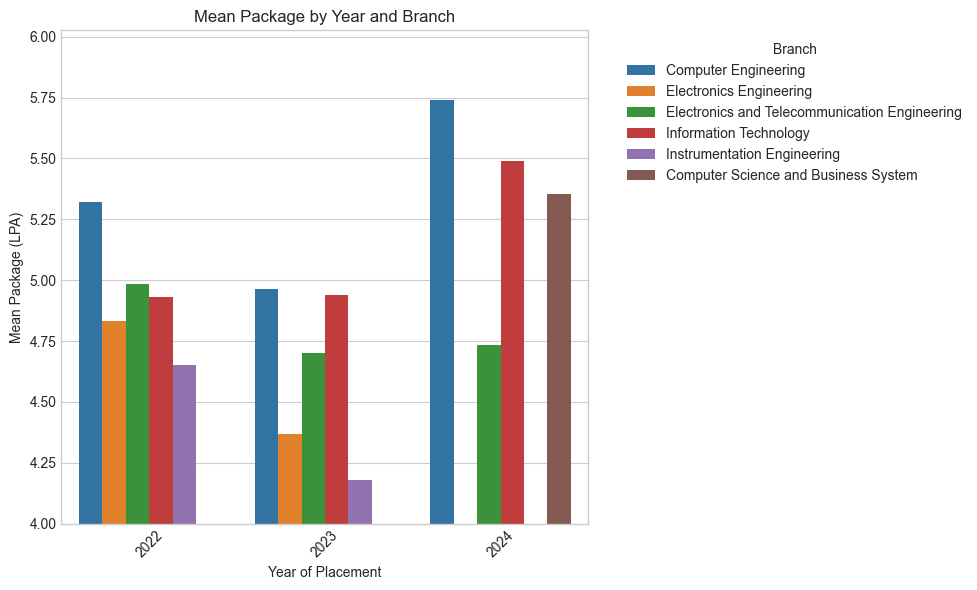

In [16]:
mean_package_by_year_branch = mean_package_by_year_branch.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year Of Placement', y='Package', hue='Branch', data=mean_package_by_year_branch)

plt.title('Mean Package by Year and Branch')
plt.xlabel('Year of Placement')
plt.ylabel('Mean Package (LPA)')
plt.xticks(rotation=45)
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(4, None)

plt.tight_layout()
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
features = ['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']
target = 'Package'

In [19]:
scaler = StandardScaler()  
df[features] = scaler.fit_transform(df[features])

**correlation**

In [20]:
correlation_matrix = df[features + [target]].corr()
correlation_matrix

,10th Percentage,12th or Diploma Percentage,BE CGPI,Package
10th Percentage,1.000000,0.316096,0.160171,0.114163
12th or Diploma Percentage,0.316096,1.000000,0.242463,0.150886
BE CGPI,0.160171,0.242463,1.000000,0.140699
Package,0.114163,0.150886,0.140699,1.000000


In [21]:
sorted_corr = correlation_matrix[target].sort_values(ascending=False)
print(sorted_corr)


Package                       1.000000
12th or Diploma Percentage    0.150886
BE CGPI                       0.140699
10th Percentage               0.114163
Name: Package, dtype: float64


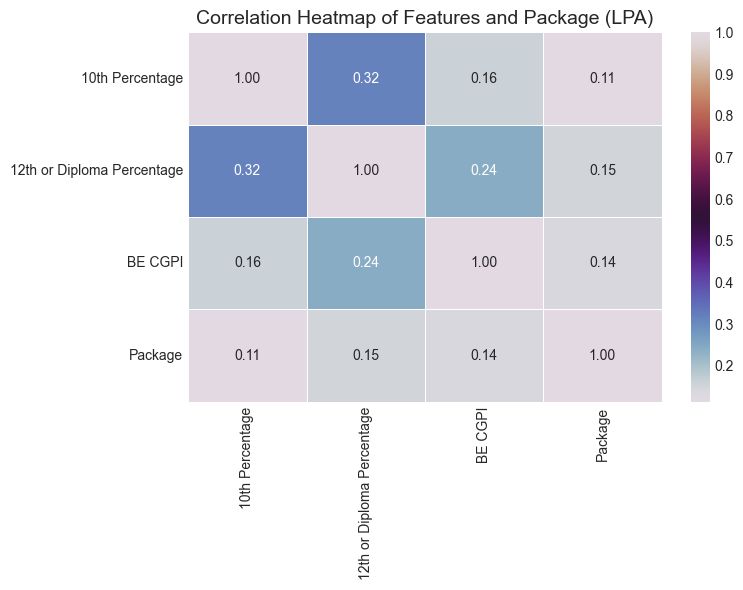

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Features and Package (LPA)', fontsize=14)

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import pearsonr

# Example correlation between 10th Percentage and Package
correlation, p_value = pearsonr(df['12th or Diploma Percentage'], df['Package'])
print(f"Correlation: {correlation}, P-value: {p_value}")


Correlation: 0.1508863690510823, P-value: 1.719777181625578e-07


**scaling and encoding**

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [26]:
df = pd.get_dummies(df, columns=['Branch'], prefix='Branch')

In [27]:
scaler = StandardScaler()
df[['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']] = scaler.fit_transform(
    df[['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']]
)

**linear regression**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
X = df[['Gender', '10th Percentage', '12th or Diploma Percentage', 'BE CGPI'] + list(df.columns[df.columns.str.startswith('Branch_')])]
y = df['Package']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 1.331484242359021
Mean Squared Error (MSE): 2.840698798792798
Root Mean Squared Error (RMSE): 1.685437272280638
R-squared (R2 Score): 0.0007188532683807258


**decision tree**

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
y_pred = tree_model.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 1.8245378151260505
Mean Squared Error (MSE): 6.310553781512605
Root Mean Squared Error (RMSE): 2.512081563467358
R-squared (R2 Score): -1.2198824535643555


**random forest**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [5, 10, 15],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples required to be at a leaf node
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Mean Absolute Error (MAE): {mae}")
print(f"Tuned Mean Squared Error (MSE): {mse}")
print(f"Tuned Root Mean Squared Error (RMSE): {rmse}")
print(f"Tuned R-squared (R2 Score): {r2}")
print("Best Parameters:", grid_search.best_params_)

Tuned Mean Absolute Error (MAE): 1.3126274967598683
Tuned Mean Squared Error (MSE): 2.772643603495663
Tuned Root Mean Squared Error (RMSE): 1.6651257020104107
Tuned R-squared (R2 Score): 0.024658833679702452
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


**gradient boosting**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.05, 0.1],   # Step size for each boosting step
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at each leaf node
}

gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_

y_pred = best_gb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")
print("Best Parameters:", grid_search.best_params_)

Mean Absolute Error (MAE): 1.3278327586346668
Mean Squared Error (MSE): 2.793604534627591
Root Mean Squared Error (RMSE): 1.6714079497919085
R-squared (R2 Score): 0.017285343992243796
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**xgboost**

In [43]:
!pip install xgboost
import xgboost as xgb

You should consider upgrading via the 'C:\Users\jaysh\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [44]:
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

best_xgboost_model = grid_search.best_estimator_

y_pred_xgboost = best_xgboost_model.predict(X_test)

mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

print(f"\nXGBoost - MAE: {mae_xgboost}")
print(f"XGBoost - MSE: {mse_xgboost}")
print(f"XGBoost - RMSE: {rmse_xgboost}")
print(f"XGBoost - R2: {r2_xgboost}")

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}

XGBoost - MAE: 1.3196466584966964
XGBoost - MSE: 2.8327644983346403
XGBoost - RMSE: 1.683081845405814
XGBoost - R2: 0.003509925966306393


**adaboost**

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
adaboost_model = AdaBoostRegressor(random_state=42)

# hyperparameters for tuning
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

grid_search_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, 
                                    scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)

grid_search_adaboost.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for AdaBoost: ", grid_search_adaboost.best_params_)

# Best model after tuning
best_adaboost_model = grid_search_adaboost.best_estimator_

y_pred_adaboost = best_adaboost_model.predict(X_test)

mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

print(f"\nAdaBoost - MAE: {mae_adaboost}")
print(f"AdaBoost - MSE: {mse_adaboost}")
print(f"AdaBoost - RMSE: {rmse_adaboost}")
print(f"AdaBoost - R2: {r2_adaboost}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for AdaBoost:  {'learning_rate': 0.01, 'n_estimators': 50}

AdaBoost - MAE: 1.3152224416660858
AdaBoost - MSE: 2.7600941247991213
AdaBoost - RMSE: 1.6613531005776951
AdaBoost - R2: 0.029073401485375405


**voting regressor**

In [47]:
from sklearn.ensemble import VotingRegressor

In [48]:
from xgboost import XGBRegressor

In [49]:
adaboost_model = AdaBoostRegressor(learning_rate=0.01, n_estimators=50, random_state=42)
xgboost_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=3, 
                             min_child_weight=5, n_estimators=200, subsample=0.7, random_state=42)
gbm_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, min_samples_leaf=1, 
                                      min_samples_split=2, n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10, 
                                 n_estimators=200, random_state=42)

In [50]:
voting_regressor = VotingRegressor(estimators=[
    ('adaboost', adaboost_model),
    ('xgboost', xgboost_model),
    ('gbm', gbm_model),
    ('random_forest', rf_model)
])
voting_regressor

VotingRegressor(estimators=[('adaboost',
                             AdaBoostRegressor(learning_rate=0.01,
                                               random_state=42)),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_polic...
                                          max_leaves=None, min_child_weight=5,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('gbm',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       random_state=42)),
                            ('random_forest',
                             RandomForestRegressor(max_depth=5,
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   n_estimators=200,
                                                   random_state=42))])

In [51]:
voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)

# Evaluate the model
mae_voting = mean_absolute_error(y_test, y_pred_voting)
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"\nVoting Regressor - MAE: {mae_voting}")
print(f"Voting Regressor - MSE: {mse_voting}")
print(f"Voting Regressor - RMSE: {rmse_voting}")
print(f"Voting Regressor - R2: {r2_voting}")


Voting Regressor - MAE: 1.3143227356591967
Voting Regressor - MSE: 2.749253764821722
Voting Regressor - RMSE: 1.6580873815398638
Voting Regressor - R2: 0.03288674746693565


**neural network**

In [52]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import r2_score
from keras.regularizers import l2

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a Sequential model
nn_model = Sequential()

# Add layers with increased complexity
nn_model.add(Dense(256, input_dim=10, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer
nn_model.add(Dropout(0.4))                               # Dropout layer for regularization
nn_model.add(Dense(64, activation='relu'))               # Hidden layer
nn_model.add(Dropout(0.4))                               # Dropout layer for regularization
nn_model.add(Dense(32, activation='relu'))               # Hidden layer
nn_model.add(Dense(1))                                   # Output layer

# Compile the model with a tuned learning rate and optimizer
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
mae_nn, mse_nn = nn_model.evaluate(X_test, y_test)

# Predict using the model to calculate R-squared
y_pred_nn = nn_model.predict(X_test)
r2_nn = r2_score(y_test, y_pred_nn)

# Print results
print(f"Neural Network - MAE: {mae_nn}, MSE: {mse_nn}, R2: {r2_nn}")


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 18.2063 - mae: 3.5733 - val_loss: 4.1700 - val_mae: 1.3544
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4882 - mae: 1.5613 - val_loss: 3.8169 - val_mae: 1.3226
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5420 - mae: 1.6152 - val_loss: 3.7194 - val_mae: 1.2720
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2424 - mae: 1.4934 - val_loss: 3.6218 - val_mae: 1.2524
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2413 - mae: 1.6022 - val_loss: 3.5376 - val_mae: 1.2428
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.1359 - mae: 1.5226 - val_loss: 3.5145 - val_mae: 1.2185
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5651 - mae: 1.4971 - val_loss: 3.5222 - val_mae: 1.1900
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6810 - mae: 1.4401 - val_loss: 3.5027 - val_mae: 1.1770
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7218 - mae:

In [53]:
import pickle

In [54]:
# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

branch_columns = list(df.columns[df.columns.str.startswith('Branch_')])

with open('branch_columns.pkl', 'wb') as branch_file:
    pickle.dump(branch_columns, branch_file)

In [55]:
with open('voting_regressor_model.pkl', 'wb') as model_file:
    pickle.dump(voting_regressor, model_file)

print("Model saved successfully!")

Model saved successfully!
